<a href="https://colab.research.google.com/github/Alyana20/project-analisis-E-commerce/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-commerce public dataset]
- **Nama:** [Cheisya Alya Natasya]
- **Email:** [m296b4kx0921@bangkit.academy]
- **ID Dicoding:** [cheisyaalya]


- Bagaimana Karakteristik demografis customer berdasarkan kode pos ?
- Apa hubungan antara lokasi customer dengan potensi penjualan ?

## Import Semua Packages/Library yang Digunakan

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

Pada tahapan Gathering Data ini data yang ada dalam data set di import. setelah di import filedata akan dikumpalkan dan ditampilkan dalam bentuk kolom

In [4]:
from google.colab import files
filenya = files.upload()

Saving E-commerce-public-dataset.zip to E-commerce-public-dataset.zip


In [5]:
filenya

In [6]:
import zipfile
import io
import pandas as pd

with zipfile.ZipFile(io.BytesIO(filenya['E-commerce-public-dataset.zip'])) as z:
    with z.open(z.namelist()[0]) as f:
        df = pd.read_csv(f, encoding='ISO-8859-1')

print(df)


                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0  

In [7]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- memuat semua data yang ada
- menampilkan data dalam bentuk kolom

### Assessing Data

In [8]:
df.info()

df.isnull().sum()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- mengidentifikasi adanya missing values pada bagian tertentu

### Cleaning Data

In [9]:
import pandas as pd

# 1. Cek Missing Values
print("Jumlah missing values sebelum cleaning:")
print(df.isnull().sum())

df = df.dropna()

print("\nJumlah missing values setelah drop:")
print(df.isnull().sum())

# 2. Cek Duplikasi
print("\nJumlah duplikasi sebelum dihapus:")
print(df.duplicated().sum())

df = df.drop_duplicates()

print("\nJumlah duplikasi setelah dihapus:")
print(df.duplicated().sum())

# 3. Standarisasi Format Data
df['customer_city'] = df['customer_city'].str.lower()

df['customer_state'] = df['customer_state'].str.upper()

# 4. Validasi Kode Negara Bagian (customer_state)

valid_states = ['SP', 'RJ', 'MG', 'RS', 'BA', 'PR', 'SC', 'PE', 'CE', 'GO', 'DF', 'PA', 'AM', 'ES', 'MA', 'PI', 'AL', 'RN', 'MS', 'MT', 'SE', 'RO', 'TO', 'AC', 'AP', 'RR']

df = df[df['customer_state'].isin(valid_states)]


Jumlah missing values sebelum cleaning:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah missing values setelah drop:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah duplikasi sebelum dihapus:
0

Jumlah duplikasi setelah dihapus:
0


**Insight:**
- membersihkan missing values
- memperbaiki beberapa tipe data yang ada pada kolom

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# statistik deskriptif
print(df.describe())


       customer_zip_code_prefix
count              98905.000000
mean               35012.093190
std                29829.719228
min                 1003.000000
25%                11250.000000
50%                24310.000000
75%                59076.000000
max                99990.000000


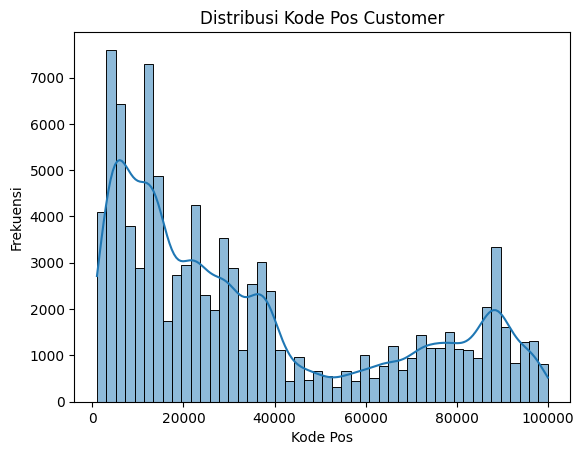

In [ ]:
# distribusi kode pos customer
sns.histplot(df['customer_zip_code_prefix'], kde=True)
plt.title('Distribusi Kode Pos Customer')
plt.xlabel('Kode Pos')
plt.ylabel('Frekuensi')
plt.show()

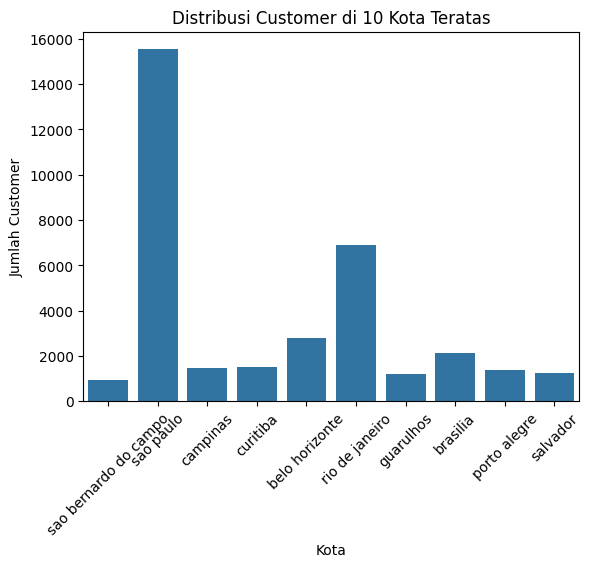

In [ ]:
# distribusi customer per kota
top_cities = df['customer_city'].value_counts().nlargest(10).index
sns.countplot(x='customer_city', data=df[df['customer_city'].isin(top_cities)])
plt.title('Distribusi Customer di 10 Kota Teratas')
plt.xlabel('Kota')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=45)
plt.show()

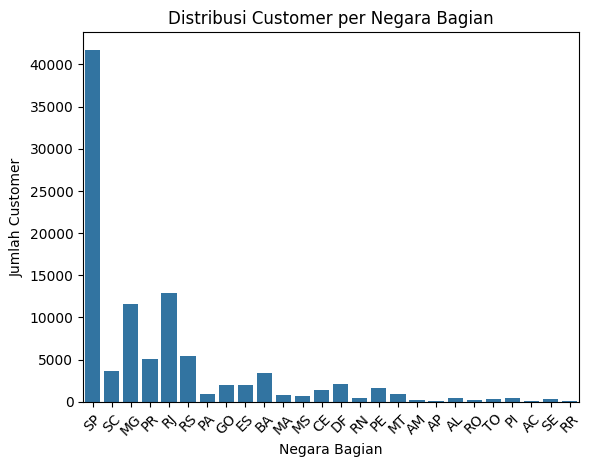

In [ ]:
# distribusi customer per negara bagian
sns.countplot(data=df, x='customer_state')
plt.title('Distribusi Customer per Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=45)
plt.show()

Insight:


*   mengetahui persebaran data distribusi
*   menampilkan persebaran data berdasarkan bagian negara dan kota



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Karakteristik demografis customer berdasarkan kode pos?


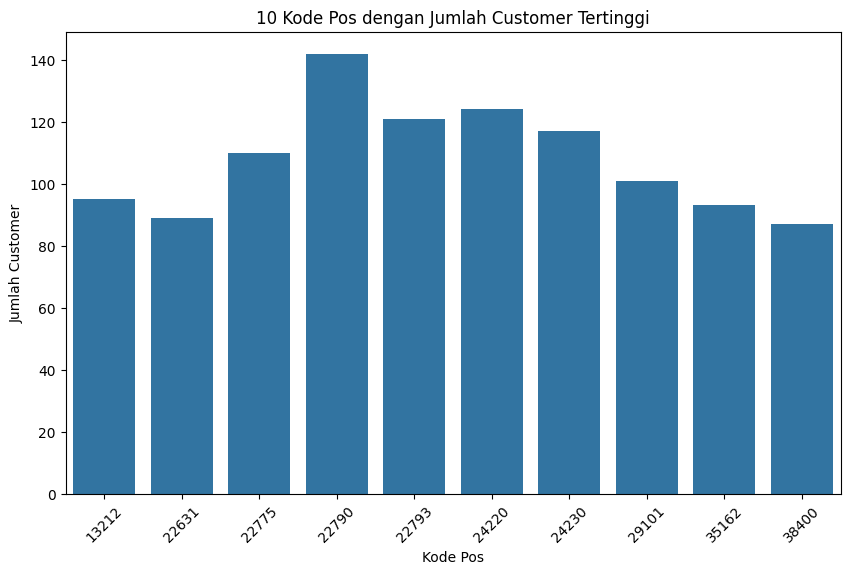

In [ ]:
# Menghitung jumlah customer berdasarkan kode pos
zip_code_counts = df['customer_zip_code_prefix'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=zip_code_counts.index, y=zip_code_counts.values)
plt.title('10 Kode Pos dengan Jumlah Customer Tertinggi')
plt.xlabel('Kode Pos')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=45)
plt.show()


Insight:


*   Pada visualisasi data diatas akan didapatkan kode pos mana yang memiliki jumlah pembeli terbanyak. Data ini akan dapat memberikan informasi mengenai daerah-daerah dengan potensi pasar yang baik



### Pertanyaan 2: Apa hubungan antara lokasi customer dan potensi penjualan?

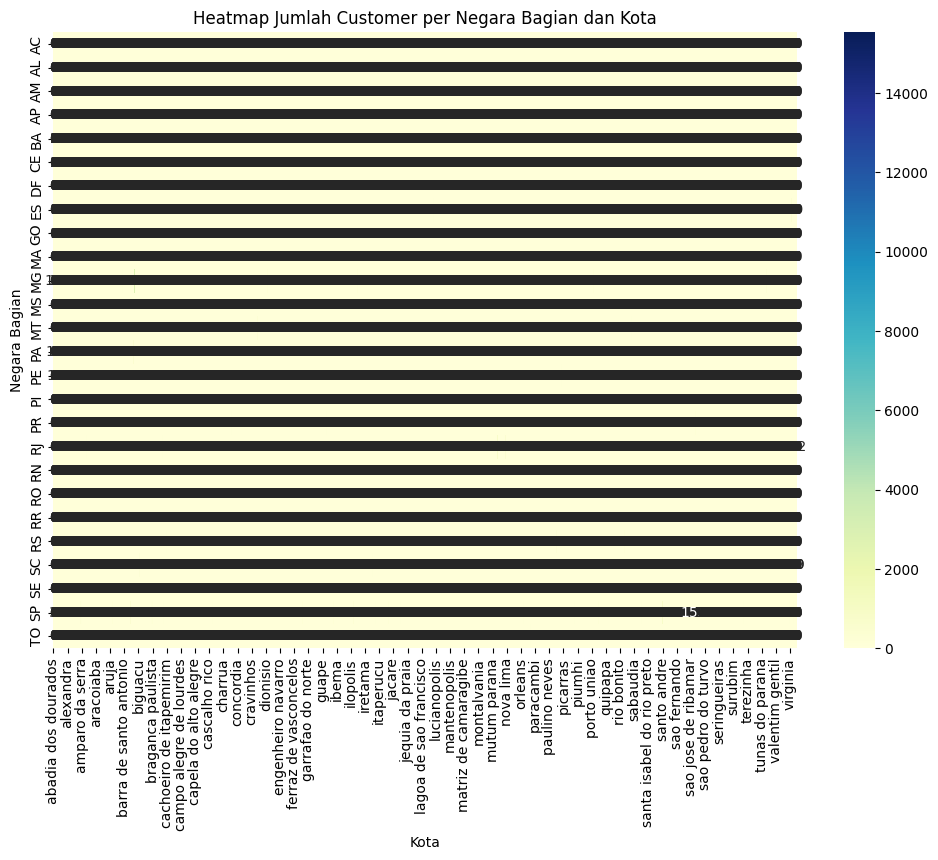

In [ ]:
# Menghitung jumlah customer per kota dan negara bagian
customer_counts = df.groupby(['customer_state', 'customer_city']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(customer_counts, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap Jumlah Customer per Negara Bagian dan Kota')
plt.xlabel('Kota')
plt.ylabel('Negara Bagian')
plt.show()

**Insight:**
- Visualisasi Heatmap tersebut dugunakan untuk menunjukan hubungan antara customer_state dan custmer_city dengan jumlah customer
- Visualisasi data tersebut digunakan untuk menganalisis hubungan antara lokasi cuctomer dengan potensi penjualan. bagian negara dan juga kota yang memikiki jumlah customer tingga dapat menjadi sasaran untuk pemasaran

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan analisis yang telah dilakukan diketahui jika lokasi customer yang terdiri dari kota dan negara, memiliki pengaruh yang signifikan terhadap potensi penjualan. dari data visualisasi yang ditampilkan fapat dilihat bawa terdapat konsentrasi customer yang cukup tinggi di beberapa kota dan negara teritama di negara bagian Sao Paulo. Hl ini menunjukan jika daerah yang memiliki jumlah pelanggan yang banyak memiliki potensi penjualan yang tinggi
- Dari visualisasi data yang telah ditampilkan kota-kota tertentu memiliki jumlah pelanggan yang lebih tinggi. Hal ini dapat diartikan jika lokasi geogafis menentukan strategi pemasaran